In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline 

#### Central Limit Theory (CLT):
1. distribution of sample means is normal
2. average of sample means is equal of average of general totality
3. standart error of mean:
$$
se = \frac{\sigma}{\sqrt{n}}\
$$
where $\sigma$ - standart deviation of general totality  
if n > 30, then:
$$
se = \frac{sd}{\sqrt{n}}\
$$
where sd - standart deviation of sample

#### it is of importance: 
*in case of increasing sample size and quantity of smaples distribution of sample means will be normal*  
*(even if general totality is not normal)*  
https://gallery.shinyapps.io/CLT_mean/  

#### Step 1
*make a general totality with normal distribution*

In [3]:
mu, sigma = 100, 10 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000).round(2)
np.mean(population) # calculate mean

99.891925

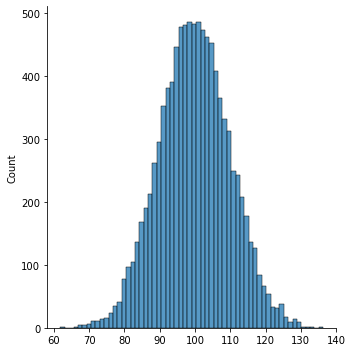

In [4]:
sns.displot(population, kde = False)

#### Step 2
*create 1000 samples and collect means of samples*

In [6]:
sample_size = 30
sample_mean=[]
n = 1000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean.append(sample.mean())

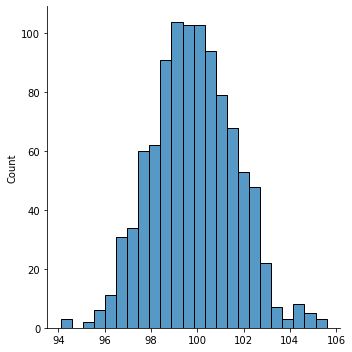

In [7]:
sns.displot(sample_mean, kde = False)

## <span style='background :yellow' > Background color is yellow </span>


### <span style='background :yellow' > Step 3 </span>

*Reality*  
*We have only one sample*


In [36]:
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([ 96.98,  97.  , 111.62,  89.24,  99.64, 113.31,  96.48,  94.81,
        87.03,  97.04, 103.67, 114.8 , 111.18,  89.42,  90.25, 118.31,
        95.95,  97.34,  91.74,  76.13, 116.18,  92.46, 128.33,  89.1 ,
        97.14,  96.37, 115.52, 106.46,  85.41, 111.74])

In [37]:
se = sample_real.std()/(sample_size**0.5)

*define confidence interval*

In [42]:
sample_real.mean() + 1.96 * se

104.54585317484

In [43]:
sample_real.mean() - 1.96 * se

96.16414682515997

In [44]:
# therefore, mean of general totality:
population.mean()

99.891925

In [45]:
# smaple mean
sample_real.mean()

100.35499999999999

*confidence interval of sample includes mean of general totality*

#### P.S. (1)
*python function for confidence interval*

In [46]:
import scipy.stats as st
import statsmodels.stats.api as sms

In [47]:
st.t.interval(0.95, len(sample_real)-1, loc=np.mean(sample_real), scale=st.sem(sample_real))

(95.90715052593532, 104.80284947406466)

In [48]:
sms.DescrStatsW(sample_real).tconfint_mean()

(95.90715052593534, 104.80284947406467)

#### P.S. (2)
*p-value - probability to get the same or more extremal value of statistic in case of null hipotesis is true*  
*calculation p-value:*  
https://gallery.shinyapps.io/dist_calc/

#### it is of importance:
- p-value does not show the power of effect  
- if we got p-value higher then threshold it does not mean that null hipotesis is true. It's just that this significance level prevents us from rejecting it